In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd

## 作業一：畫出台灣鐵路圖
###### 備註:尚在研究疊加台灣地圖上去的方法

In [26]:
gdf=gpd.GeoDataFrame
gdf_Rail=gdf.from_file('RAIL_1080626.shp',encoding='utf-8')
gdf_Rail.head()

,RAILID,RAILNAME,RAILTYPE,MDATE,DEFINITION,geometry
0,A0000000002,臺鐵縱貫線北段,3,201806,1,"LINESTRING (299180.901 2768898.613, 299301.099..."
1,A0000000003,臺鐵縱貫線北段,3,201806,1,"LINESTRING (303403.551 2770996.349, 303400.496..."
2,A0000000004,臺鐵縱貫線北段,3,201806,1,"LINESTRING (303403.551 2770996.349, 303400.372..."
3,A0000000005,臺鐵縱貫線北段,3,201806,1,"LINESTRING (303403.551 2770996.349, 303610.587..."
4,B0000000031,臺鐵臺中線(山線),2,201706,0,"LINESTRING (207646.264 2667909.700, 207649.871..."


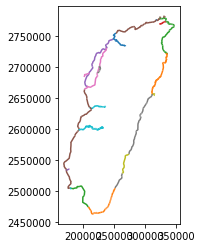

In [27]:
gdf_Rail.plot(column='RAILNAME')

## 作業二：台北、台中、台南之每年(1897-1945,大約日治時期)平均溫折線圖

In [18]:
import csv
with open('Mt8.csv', newline='') as csvfile:
    t=pd.read_csv(csvfile)
t=pd.DataFrame(t)
t

t=t.drop(index=[0, 1,2,3,53])
t.head()


,表8 歷 年 平 均 氣 溫,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22
4,民國前 十 五 年(1897),21.7,.,.,.,.,.,22.4,24.0,.,...,.,.,.,.,.,.,.,.,.,.
5,十 四 年(1898),21.8,.,.,.,.,.,22.2,23.2,.,...,.,.,.,.,.,.,.,.,.,.
6,十 三 年(1899),21.4,.,.,.,.,.,21.8,22.7,.,...,.,.,.,.,.,.,.,.,.,.
7,十 二 年(1900),21.6,.,.,.,.,.,22.3,23.1,.,...,.,.,.,.,.,.,.,.,.,.
8,十 一 年(1901),21.1,.,.,.,.,.,22.0,22.8,.,...,22.8,.,.,.,.,.,.,.,.,.


In [19]:
t=t.reindex(columns=['Unnamed: 1','Unnamed: 7','Unnamed: 8'])
t

t= t.applymap(float)
t.head()


,Unnamed: 1,Unnamed: 7,Unnamed: 8
4,21.7,22.4,24.0
5,21.8,22.2,23.2
6,21.4,21.8,22.7
7,21.6,22.3,23.1
8,21.1,22.0,22.8


In [20]:

t.columns.values
t.columns = ['taipei', 'taichung', 'tainan']
year=list(range(1897,1946))
t.index=year
t.head()

,taipei,taichung,tainan
1897,21.7,22.4,24.0
1898,21.8,22.2,23.2
1899,21.4,21.8,22.7
1900,21.6,22.3,23.1
1901,21.1,22.0,22.8


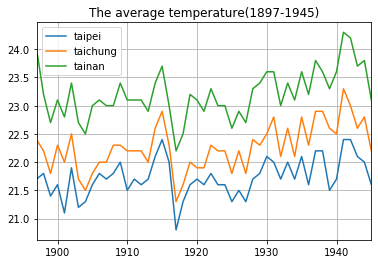

In [21]:
t.plot(use_index=True,title='The average temperature(1897-1945)',grid=True)


array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000264CD852D30>,
      dtype=object)

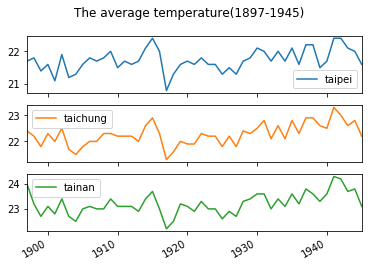

In [22]:
t.plot(subplots=True,title='The average temperature(1897-1945)')